In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Загрузка данных

### Датасет user_song_df

In [2]:
user_song_df = pd.read_csv('user_song_df.csv', index_col=0)
user_song_df.head()

user_id             song_id  play_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAPDEY12A81C210A9           1   
1  fd13b9d49c54e00ff413fe3c095ba581c7fc611e  SOAPDEY12A81C210A9           8   
2  35752a9e4d917c8fc5da88e90c25adc6b52220b6  SOAPDEY12A81C210A9           1   
3  bfe8d6d1e32d9de12c632d68712e7e4a23416e93  SOAPDEY12A81C210A9           1   
4  46d3ef1b4f317aba8f0226e937c67ecef9fa2e42  SOAPDEY12A81C210A9           4   

                  title     release    artist_name  year            track_id  \
0  Nothing from Nothing  To Die For  Billy Preston  1974  TRIRLYL128F42539D1   
1  Nothing from Nothing  To Die For  Billy Preston  1974  TRIRLYL128F42539D1   
2  Nothing from Nothing  To Die For  Billy Preston  1974  TRIRLYL128F42539D1   
3  Nothing from Nothing  To Die For  Billy Preston  1974  TRIRLYL128F42539D1   
4  Nothing from Nothing  To Die For  Billy Preston  1974  TRIRLYL128F42539D1   

  genre  
0   r&b  
1   r&b  
2   r&b  
3   r&b  
4   r&b

### Датасет song_df

In [3]:
song_df = pd.read_csv('song_df.csv', index_col=0)
song_df.head()

song_id              title  \
0  SOQMMHC12AB0180CB8       Silent Night   
1  SOVFVAK12A8C1350D9        Tanssi vaan   
2  SOGTUKN12AB017F4F1  No One Could Ever   
3  SOBNYVR12A8C13558C      Si Vos Querés   
4  SOHSBXH12A8C13B0DF   Tangle Of Aspens   

                                release       artist_name  year  \
0                 Monster Ballads X-Mas  Faster Pussy cat  2003   
1                           Karkuteillä  Karkkiautomaatti  1995   
2                                Butter    Hudson Mohawke  2006   
3                               De Culo       Yerba Brava  2003   
4  Rene Ablaze Presents Winter Sessions        Der Mystic     0   

             track_id              genre  latitude  longitude  \
0  TRMMMYQ128F932D901          christmas    0.0000    0.00000   
1  TRMMMKD128F425225D                pop    0.0000    0.00000   
2  TRMMMRX128F93187D9  electronica/dance   55.8578   -4.24251   
3  TRMMMCH128F425532C      international    0.0000    0.00000   
4  TRMMMWA128F426B589           no_genre    0.0000    0.00000   

            location  
0                  0  
1                  0  
2  Glasgow, Scotland  
3                  0  
4                  0

# Разведочный анализ данных
### Датасет user_song_df

In [4]:
print(f'Количество уникальных пользователей: {user_song_df.user_id.nunique()}')
print(f'Количество уникальных песен: {user_song_df.song_id.nunique()}')

Количество уникальных пользователей: 1019318
Количество уникальных песен: 378309


Посмотрим на количество прослушиваний пользователями песен.

In [5]:
user_song_df.describe().round(2)

play_count         year
count  45795099.00  45795099.00
mean          1.93      1694.26
std           1.65       720.35
min           1.00         0.00
25%           1.00      1989.00
50%           1.00      2002.00
75%           2.00      2007.00
max           9.00      2011.00

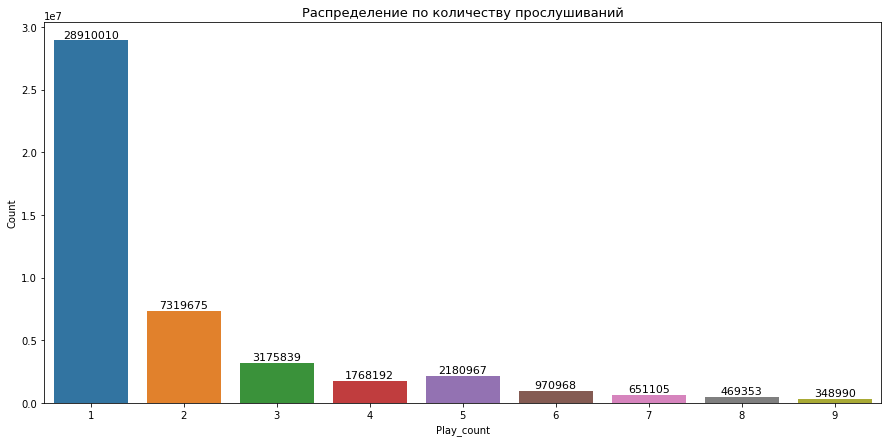

In [6]:
fig = plt.figure(figsize = (15, 7))

ax = sns.countplot(x='play_count', data=user_song_df);

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 200000, 
            rect.get_height(), horizontalalignment='center', fontsize = 11)

plt.title('Распределение по количеству прослушиваний', fontsize=13);
plt.ylabel('Count', fontsize=10);
plt.xlabel('Play_count',  fontsize=10);

Посмотрим на общее количество прослушанных песен для каждого пользователя.

In [7]:
song_count = user_song_df.groupby('user_id', as_index=False).agg({'play_count': 'sum', 'song_id': 'count'}) \
                            .rename(columns={'song_id': 'count_song', 'play_count': 'listen_count'})

song_count['listen_count_norm'] = song_count['listen_count'] / song_count['count_song']
song_count.sort_values(by='listen_count', ascending=False).head()

user_id  listen_count  count_song  \
941420  ec6dfcf19485cb011e0b22637075037aae34cf26          5146        4316   
69497   119b7c88d58d0c6eb051365c103da5caf817bea6          3169        1362   
311875  4e73d9e058d2b1f2dba9c1fe4a8f416f9f58364f          3086        1470   
731664  b7c24f770be6b802805ac0e2106624a517643c17          3057        1364   
859158  d7d2d888ae04d16e994d6964214a1de81392ee04          3032        1257   

        listen_count_norm  
941420           1.192308  
69497            2.326725  
311875           2.099320  
731664           2.241202  
859158           2.412092

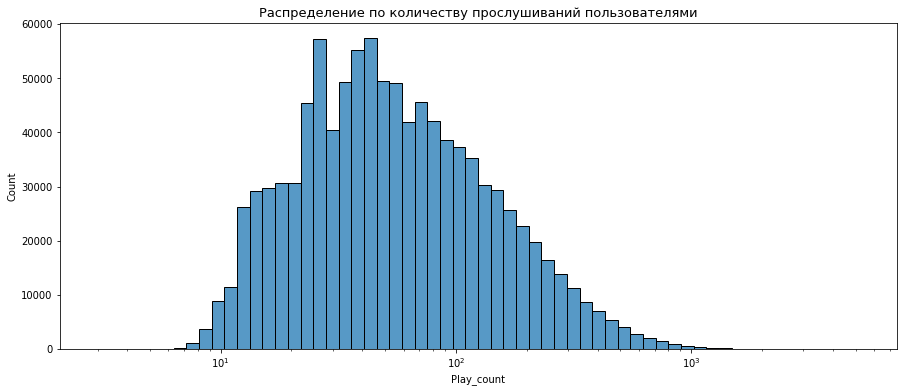

In [8]:
fig = plt.figure(figsize = (15, 6))

sns.histplot(x='listen_count', data=song_count, log_scale=True, bins=60);

plt.title('Распределение по количеству прослушиваний пользователями', fontsize=13);
plt.ylabel('Count', fontsize=10);
plt.xlabel('Play_count',  fontsize=10);

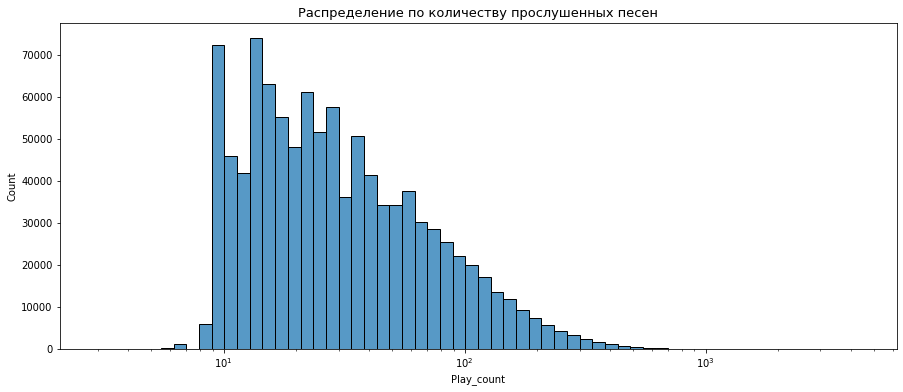

In [9]:
fig = plt.figure(figsize = (15, 6))

sns.histplot(x='count_song', data=song_count, log_scale=True, bins=60);

plt.title('Распределение по количеству прослушенных песен', fontsize=13);
plt.ylabel('Count', fontsize=10);
plt.xlabel('Play_count',  fontsize=10);

Из построенного распределения видно, что большая часть пользователей прослушала от 10 до 100 песен.

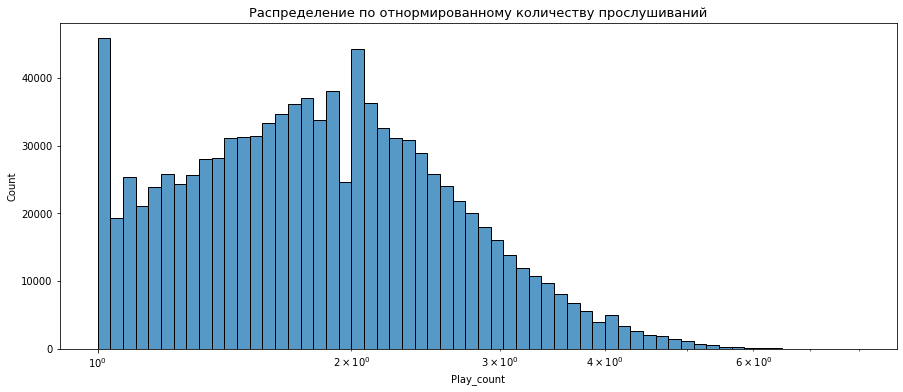

In [10]:
fig = plt.figure(figsize = (15, 6))

sns.histplot(x='listen_count_norm', data=song_count, log_scale=True, bins=60);

plt.title('Распределение по отнормированному количеству прослушиваний', fontsize=13);
plt.ylabel('Count', fontsize=10);
plt.xlabel('Play_count',  fontsize=10);

#### Топ 20 самых популярных песен
Определим самые популярные треки на основе количества прослушиваний каждого трека.

In [11]:
song_grouped_sum = user_song_df.groupby(['song_id', 'title', 'artist_name'], as_index=False).agg({'play_count': 'sum'}) \
                               .rename(columns={'play_count': 'sum_play_count'}).sort_values('sum_play_count', ascending=False)
song_grouped_sum.head()

song_id                                              title  \
24628   SOBONKR12A58A7A7E0                                     You're The One   
14093   SOAXGDH12A8C13F8A1                     Dog Days Are Over (Radio Edit)   
282752  SOSXLTC12AF72A7F54                                            Revelry   
213016  SONYKOW12AB01849C9                                            Secrets   
66809   SOEGIYH12A6D4FC0E3  Horn Concerto No. 4 in E flat K495: II. Romanc...   

                                              artist_name  sum_play_count  
24628                                       Dwight Yoakam          223446  
14093                              Florence + The Machine          219038  
282752                                      Kings Of Leon          202174  
213016                                        OneRepublic          187221  
66809   Barry Tuckwell/Academy of St Martin-in-the-Fie...          171011

In [12]:
grouped_sum = song_grouped_sum.sum_play_count.sum()

song_grouped_sum['persentage_sum'] = (song_grouped_sum.sum_play_count / grouped_sum) * 100
song_grouped_sum.head(20)

song_id                                              title  \
24628   SOBONKR12A58A7A7E0                                     You're The One   
14093   SOAXGDH12A8C13F8A1                     Dog Days Are Over (Radio Edit)   
282752  SOSXLTC12AF72A7F54                                            Revelry   
213016  SONYKOW12AB01849C9                                            Secrets   
66809   SOEGIYH12A6D4FC0E3  Horn Concerto No. 4 in E flat K495: II. Romanc...   
173550  SOLFXKT12AB017E3E0                                          Fireflies   
85647   SOFLJQZ12A6D4FADA6                                           Tive Sim   
239166  SOPUCYA12A8C13A694                                             Canada   
307666  SOUSMXX12AB0185C24                                                OMG   
121082  SOHTKMO12AB01843B0  Catch You Baby (Steve Pitron & Max Sanna Radio...   
326424  SOWCKVR12A8C142411                                       Use Somebody   
309344  SOUVTSM12AC468F6A7                                     Drop The World   
296067  SOTWNDJ12A8C143984                                           Marry Me   
24798   SOBOUPA12A6D4F81F1                              Sincerité Et Jalousie   
217207  SOOFYTN12A6D4F9B35                                         Représente   
161996  SOKLRPJ12A8C13C3FE                                      The Scientist   
300931  SOUFTBI12AB0183F65                                            Invalid   
313365  SOVDSJC12A58A7A271                                   Ain't Misbehavin   
238798  SOPTLQL12AB018D56F  Billionaire [feat. Bruno Mars]  (Explicit Albu...   
236777  SOPPROJ12AB0184E18                   Pursuit Of Happiness (nightmare)   

                                              artist_name  sum_play_count  \
24628                                       Dwight Yoakam          223446   
14093                              Florence + The Machine          219038   
282752                                      Kings Of Leon          202174   
213016                                        OneRepublic          187221   
66809   Barry Tuckwell/Academy of St Martin-in-the-Fie...          171011   
173550                                 Charttraxx Karaoke          141670   
85647                                             Cartola          127642   
239166                                   Five Iron Frenzy          116773   
307666                          Usher featuring will.i.am          114676   
121082                                      Lonnie Gordon          110608   
326424                                      Kings Of Leon          109240   
309344                                 Lil Wayne / Eminem          107085   
296067                                              Train          104870   
24798                                     Alliance Ethnik          104200   
217207                                    Alliance Ethnik           98446   
161996                                           Coldplay           94512   
300931                                           Tub Ring           91861   
313365                                          Sam Cooke           91126   
238798                                       Travie McCoy           89396   
236777                          Kid Cudi / MGMT / Ratatat           88626   

        persentage_sum  
24628         0.252957  
14093         0.247966  
282752        0.228875  
213016        0.211947  
66809         0.193596  
173550        0.160380  
85647         0.144500  
239166        0.132195  
307666        0.129821  
121082        0.125216  
326424        0.123667  
309344        0.121228  
296067        0.118720  
24798         0.117962  
217207        0.111448  
161996        0.106994  
300931        0.103993  
313365        0.103161  
238798        0.101203  
236777        0.100331

#### Топ 20 самых популярных исполнителей

In [13]:
artist_grouped_cnt = user_song_df.groupby(['artist_name'], as_index=False).agg({'play_count': 'count'}) \
                                 .rename(columns={'play_count': 'listen_count'}).sort_values('listen_count', ascending=False)

grouped_sum = artist_grouped_cnt.listen_count.sum()
artist_grouped_cnt['persentage'] = (artist_grouped_cnt.listen_count / grouped_sum) * 100
artist_grouped_cnt.head(20)

artist_name  listen_count  persentage
7238                       Coldplay        341322    0.745324
19461                 Kings Of Leon        247260    0.539927
12609        Florence + The Machine        235223    0.513642
35594                   The Killers        204790    0.447188
16325                  Jack Johnson        200993    0.438896
24791                          Muse        189086    0.412896
18576                 Justin Bieber        188485    0.411583
28534                     Radiohead        182833    0.399241
34455                The Black Keys        176574    0.385574
8376                      Daft Punk        175708    0.383683
11432                        Eminem        166870    0.364384
20976                   Linkin Park        158412    0.345915
23587                     Metallica        152327    0.332627
26266                   OneRepublic        149209    0.325819
33900                  Taylor Swift        130587    0.285155
7622   Creedence Clearwater Revival        122607    0.267730
17804                    John Mayer        122551    0.267607
14467                 Guns N' Roses        121975    0.266349
1623                  Amy Winehouse        115468    0.252141
12683                  Foo Fighters        113765    0.248422

### Датасет song_df
Посмотрим на основные характеристики данных:

In [14]:
print(f'Количество уникальных песен: {song_df.song_id.nunique()}')
print(f'Количество уникальных исполнителей: {song_df.artist_name.nunique()}\n')
print(f'Минимальный год выхода трека: {song_df.year[song_df.year > 0].min()}')
print(f'Максимальный год выхода трека: {song_df.year[song_df.year > 0].max()}')
print(f'Количество треков, для которых определен год: {song_df.song_id[song_df.year > 0].count()}')
print(f'Количество треков, для которых определен жанр: {song_df.song_id[song_df.genre != "no_genre"].count()}')

Количество уникальных песен: 980144
Количество уникальных исполнителей: 69991

Минимальный год выхода трека: 1922
Максимальный год выхода трека: 2011
Количество треков, для которых определен год: 614013
Количество треков, для которых определен жанр: 817118


Посмотрим на распределение треков по году выпуска трека. 

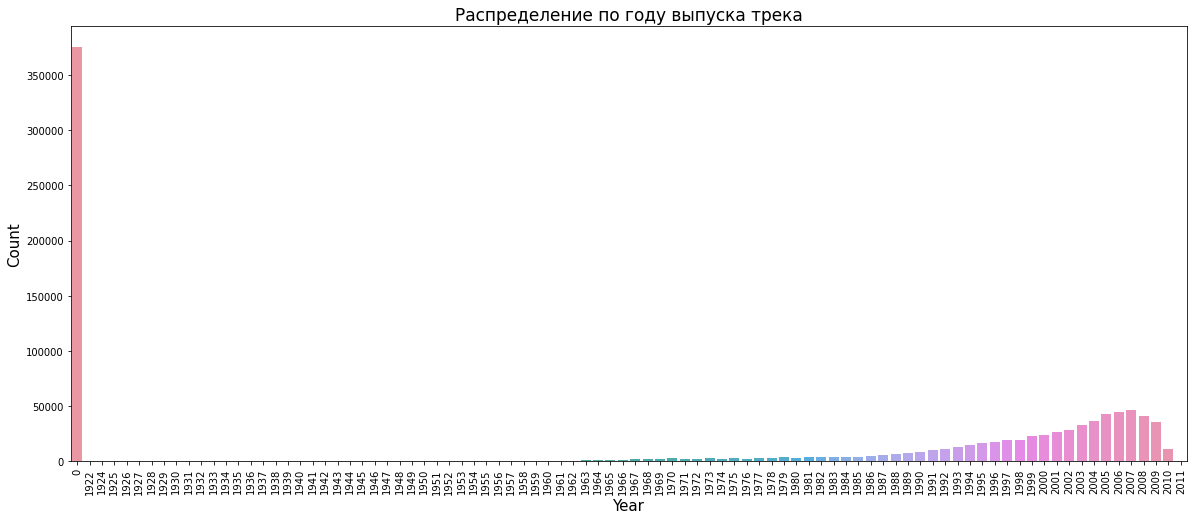

In [15]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='year', data=song_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.title('Распределение по году выпуска трека', fontsize=17)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Year', fontsize=15);

Посмотрим на распределение треков по жанрам.

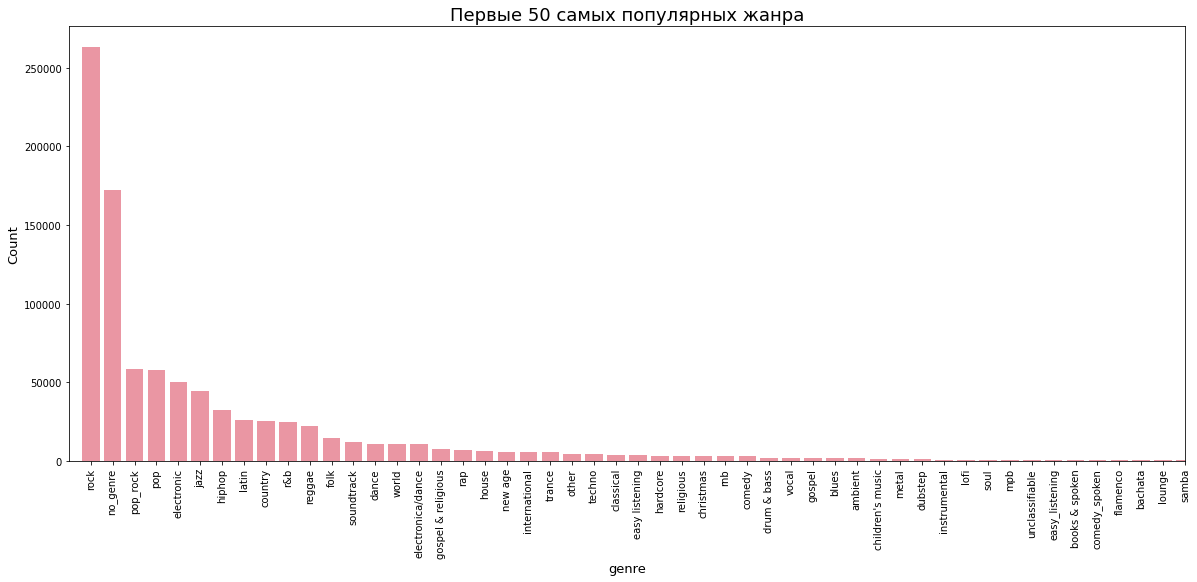

In [16]:
fig = plt.figure(figsize = (20, 8))

ax = sns.countplot(x='genre', data=song_df, order=song_df['genre'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.xlim(-1, 50)

plt.title('Первые 50 самых популярных жанра', fontsize=18)
plt.ylabel('Count', fontsize=13);
plt.xlabel('genre', fontsize=13);

Построим карту происхождения исполнителей треков.

In [17]:
artist_location = song_df[['artist_name', 'location', 'latitude', 'longitude']].drop_duplicates()
artist_location.head()

artist_name           location  latitude  longitude
0  Faster Pussy cat                  0    0.0000    0.00000
1  Karkkiautomaatti                  0    0.0000    0.00000
2    Hudson Mohawke  Glasgow, Scotland   55.8578   -4.24251
3       Yerba Brava                  0    0.0000    0.00000
4        Der Mystic                  0    0.0000    0.00000

In [18]:
artist_lat = artist_location[artist_location.location != 0].latitude
artist_lon = artist_location[artist_location.location != 0].longitude
text = artist_location[artist_location.location != 0].artist_name

In [19]:
fig = px.scatter_mapbox(
    artist_location,
    lat='latitude',
    lon='longitude',
    hover_name='location',
    hover_data=['artist_name'],
    color_discrete_sequence=['red'],
    zoom=2,
    height=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

fig.show("notebook")